In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 4: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization
### Due Date: Tuesday 10/28 by 11:59 PM PST

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

## Introduction

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this assignment, you will perform tasks to clean, visualize, and explore the bike sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots

## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For plots, your plots should be *similar* to the given examples. They don't need to be identical (*e.g.* same colors).

**Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

In [2]:
# Run this cell to set up your notebook.  Make sure ds100_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

## Loading Bike Sharing Data
The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [3]:
# Run this cell to download the data.  No further action is needed

data_url = 'https://github.com/DS-100/fa20/raw/gh-pages/resources/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Mon Oct 27 21:16:09 2025
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data\.ipynb_checkpoints
	 data\bikeshare.txt


### Examining the file contents

Can you identify the file format? (No answer required.)

In [4]:
# Run this cell to look at the top of the file.  No further action is needed
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [5]:
# Run this cell to view some metadata.  No further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the data

The following code loads the data into a Pandas DataFrame.

In [6]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 0: Examining the Data

Before we start working with the data, let's examine its granularity.

<!-- BEGIN QUESTION -->

### Question 0
#### Question 0A
What is the granularity of the data (i.e. what does each row represent)?

<!--
BEGIN QUESTION
name: q0a
points: 1
manual: true
-->

**Your response:** Each row represents bike sharing data per hour.

In [7]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<!-- BEGIN QUESTION -->

#### Question 0B
For this assignment, we'll be using this data to study bike usage in Washington D.C. Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that you can collect to address some of these limitations?

<!--
BEGIN QUESTION
name: q0b
points: 1
manual: true
-->

**Your response:** Some examples for limitations are:
There is no indication of the number of bikes available to rent, per hour could be too large of a division. There is no feature for how much traffic there is currently. 

In [8]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Assume `1` corresponds to `Clear`, `2` corresponds to `Mist`, and so on.

**Note:** If you want to revert changes, run the cell that reloads the csv.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The nested dictionary method mentioned in the documentation would be an efficient option, but there are other ways as well!
<!--
BEGIN QUESTION
name: q1a
points: 2
-->

In [ ]:
# Modify holiday weekday, workingday, and weathersit here.

factor_dict = {
    'holiday': {
        0: 'no',
        1: 'yes'
    },
    'weekday': {
        0: 'Sun',
        1: 'Mon',
        2: 'Tue',
        3: 'Wed',
        4: 'Thu',
        5: 'Fri',
        6: 'Sat'
    },
    'workingday': {
        0: 'no',
        1: 'yes'
    },
    'weathersit': {
        1: 'Clear',
        2: 'Mist',
        3: 'Light',
        4: 'Heavy'
    }
}
bike = bike.replace(factor_dict) 
bike.head()

In [ ]:
grader.check("q1a")

#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.
<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [ ]:
num_holidays =  bike['holiday'].value_counts()['yes']
num_holidays

In [ ]:
grader.check("q1b")

#### Question 1c (Computing Daily Total Counts)
In the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

<!--
BEGIN QUESTION
name: q1c
points: 2
-->

In [ ]:
daily_counts = (
    bike
    .groupby(['dteday'])
    .agg(
        {
            "casual": "sum",
            "registered": "sum",
            "workingday": 'last'
        }
    )
)

daily_counts.head()

In [ ]:
grader.check("q1c")

---
## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

<!-- BEGIN QUESTION -->

### Question 2
#### Question 2a

Use [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c. 

Include a legend, xlabel, ylabel, and title. Note that the `alpha` argument determines the opacity of plotted elements. 

After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

<img src='images/casual_v_registered.png' width="600px" />

<!--
BEGIN QUESTION
name: q2a
points: 2
manual: true
-->

In [ ]:
#Your plot

sns.histplot(daily_counts, x='casual', stat='density', kde=True, label='casual')
sns.histplot(daily_counts, x='registered', stat='density', kde=True, label='registered', color='green')

plt.legend()
plt.title('Distribution Comparison of Casual vs Registered Riders')
plt.xlabel('Rider Count')
plt.ylabel('Density')


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 
<!--
BEGIN QUESTION
name: q2b
points: 2
manual: true
-->

**Your response:** Casual riders: The distribution peaks sharply around 1000 riders per day and is skewed to the right. Most days have fewer casual riders, but a few days reach around 2500 riders, creating a long tail.
Registered riders: The distribution is more symmetric and centered around 4000 riders per day. It has a wider spread and less skew compared to casual riders.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2c

The density plots do not show us how the counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. Color the points in the scatterplot according to whether or not the day is a working day (your colors do not have to match ours exactly, but they should be different based on whether the day is a working day). 

There are many points in the scatter plot, so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. 

<img src='images/casual_registered_working_nonworking.png' width="600px" />

**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.

<!--
BEGIN QUESTION
name: q2c
points: 2
manual: true
-->

In [ ]:
# Make the font size a bit bigger
sns.set(font_scale=1)
sns.lmplot(x="casual", y="registered", hue="workingday", data=bike, fit_reg=True, height=8, scatter_kws={"s": 10})
plt.title("Comparison of Casual vs Registered Riders on Working and Non-working Days")


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does [overplotting](http://www.textbook.ds100.org/ch/06/viz_principles_2.html) have on your ability to describe this relationship?

<!--
BEGIN QUESTION
name: q2d
points: 2
manual: true
-->

**Your response:** There is a linear relationship between casual and registered riders that differs based on whether it's a working day or not. Overplotting issues include the blue points (non-working days) are hidden behind the orange points (working days), making it hard to see the pattern. It's also difficult to see how concentrated the data points are near the regression lines, especially near zero.

---
## 3: Understanding Daily Patterns

### Question 3

#### Question 3a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  

Your plot should look like the plot below. While we don't expect your plot's colors to match ours exactly, your plot should have different colored lines for different kinds of riders.

<img src="images/diurnal_bikes.png" width="600px"/>

<!--
BEGIN QUESTION
name: q5a
points: 2
manual: true
-->

In [ ]:
plt.figure(figsize=(10, 7))
hourly_means = bike.groupby('hr')[['casual', 'registered']].mean()
sns.lineplot(x=hourly_means.index, y=hourly_means['casual'], label='casual')

sns.lineplot(x=hourly_means.index, y=hourly_means['registered'], label='registered')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Average Count of Casual vs. Registered by Hour');


#### Question 3b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.
<!--
BEGIN QUESTION
name: q5b
points: 2
manual: true
-->

**Your response:** There is a strong evidence of daily patterns in both datasets. The casual riders  ride throughout the day with peak hours in the mid-afternoon. THe registered
riders ride more during the day than at night there are very strong spikes during the morning and evening commute hours with a small bump during lunch. 

## 4: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 4

#### Question 4a
Create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders for each record.
<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [ ]:
bike['prop_casual'] = bike['casual'] / (bike['casual'] + bike['registered'])

In [ ]:
grader.check("q4a")

#### Question 4b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

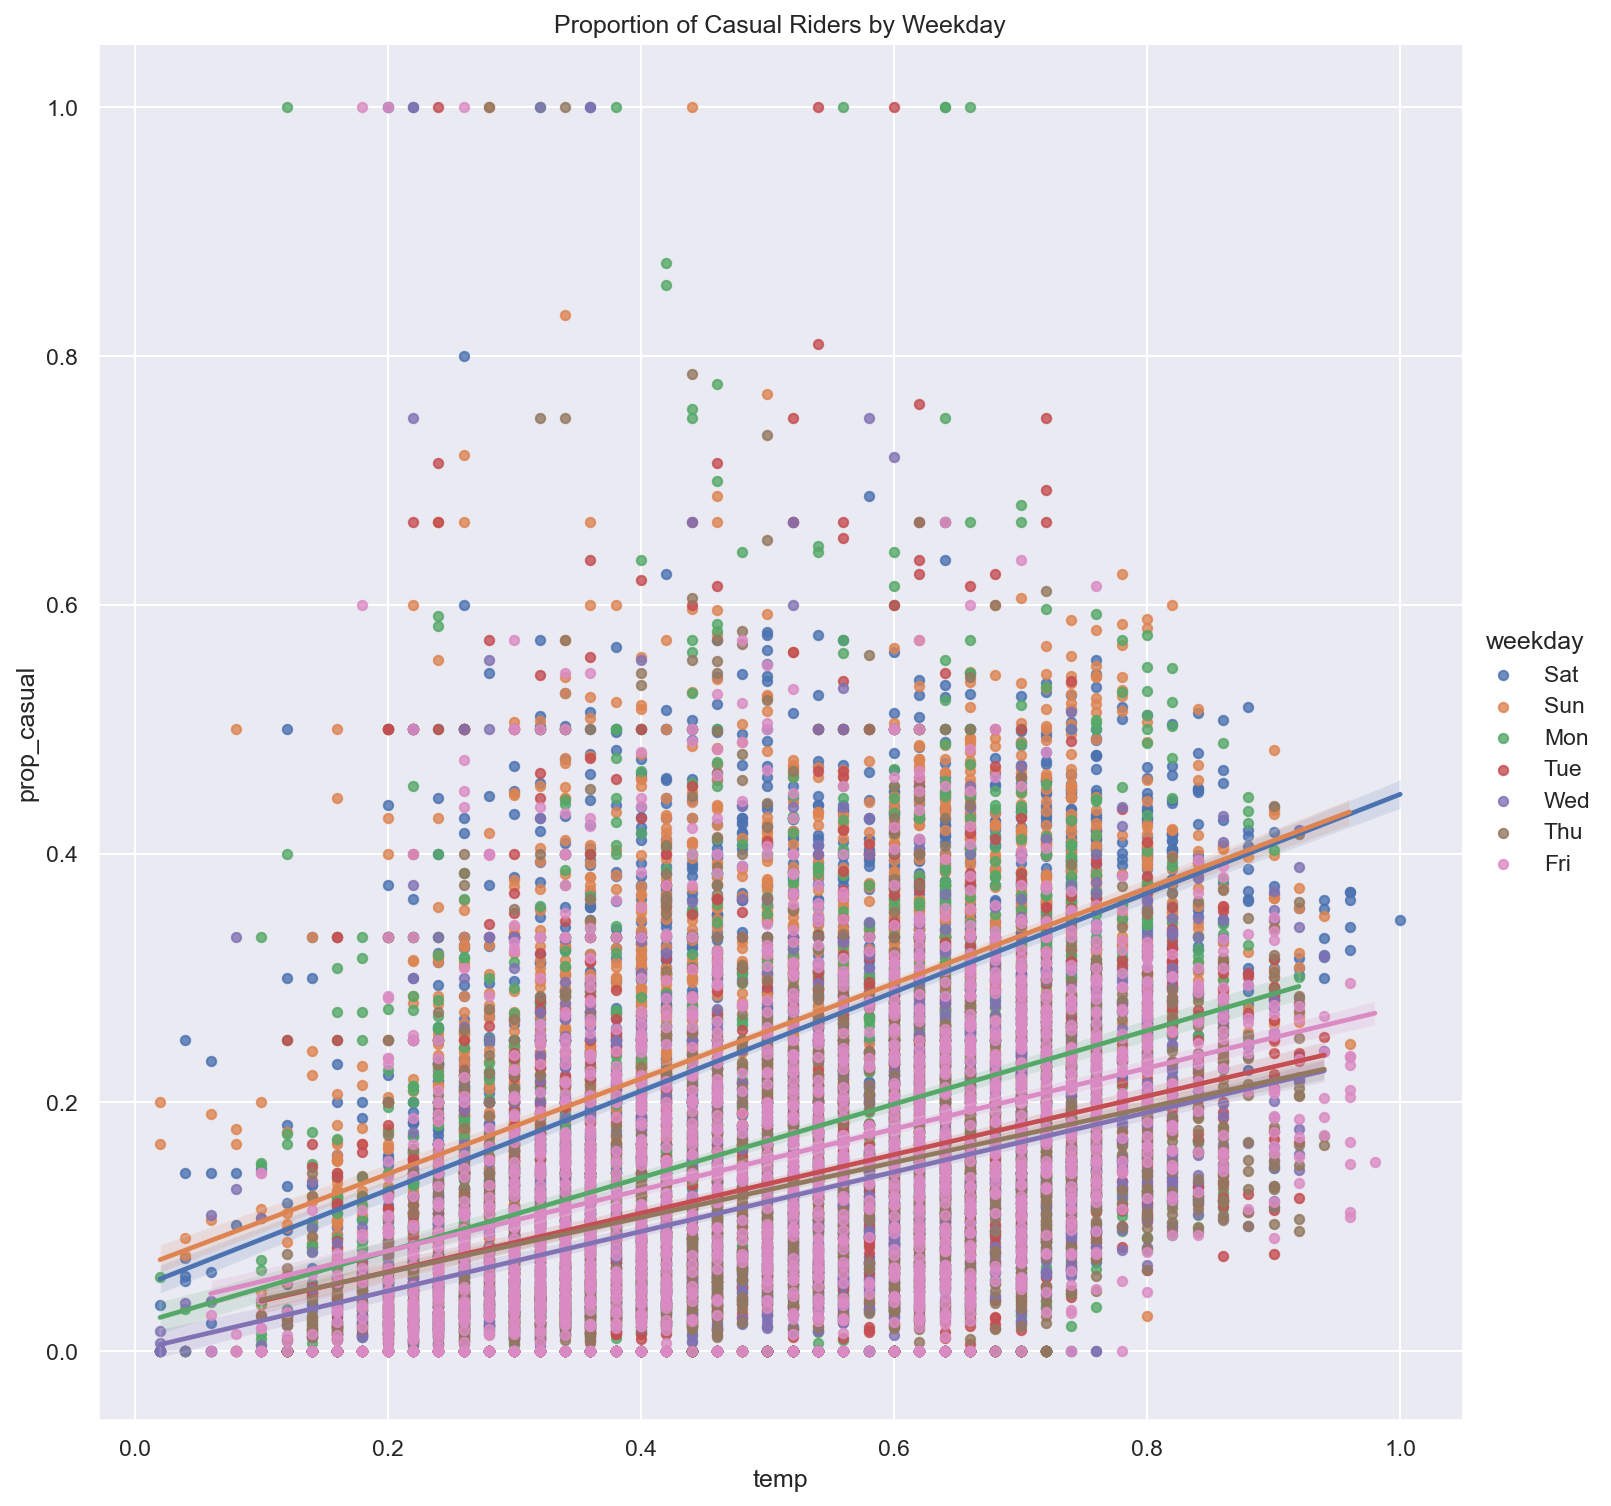

In [24]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

In [25]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

<!-- BEGIN QUESTION -->

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting.

You do not need to match the colors on our sample plot as long as the colors in your plot make it easy to distinguish which day they represent.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate.

* Look at the top of this homework notebook for a description of the temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} * \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well!
<!--
BEGIN QUESTION
name: q6b
points: 4
manual: true
-->

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))

for day in bike['weekday'].unique():
    
    this_day = bike[bike['weekday'] == day].copy()
    this_day['temp'] = this_day['temp'] * 41 * 9/5 + 32
    ysmooth = lowess(this_day['prop_casual'], this_day['temp'], return_sorted=False)
    sns.lineplot(x=this_day['temp'], y=ysmooth, label=day)

plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Casual Rider Proportion")
plt.legend();

#### Question 4c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?
<!--
BEGIN QUESTION
name: q4c
points: 2
manual: true
-->

**Your response**: As temperature increases, the proportion of casual riders increases as well, the trend appears to continue even into very hot weather. Weekends (Saturday, Sunday) have higher proportion of casual riders. There are four distinct types of days: weekends,
Mondays, Fridays, and mid-week days. 

## Question 5: Expanding our Analysis

### Question 5
#### Question 5a

Imagine you are working for a Bike Sharing Company that collaborates with city planners, transportation agencies, and policy makers in order to implement bike sharing in a city. These stakeholders would like to 1) reduce congestion and lower transportation costs, and 2) ensure the bike sharing program is implemented equitably, such that bike shares are readily available to all members of the city across different socio-economic classes, races, and neighborhoods.  

Take a high-level perspective on your dataset. In what ways are our data already suited for informing these two objectives? What kind of data might we want to collect to redress deficiencies in our dataset's ability to address these objectives?

<!--
BEGIN QUESTION
name: q5a
points: 2
manual: true
-->

**Your response**: ...

In [26]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

#### Question 5b
[Bike sharing is growing in popularity](https://www.bts.gov/newsroom/bike-share-stations-us) and new cities and regions are making efforts to implement bike sharing systems that complement their other transportation offerings. The [goals of these efforts](https://www.wired.com/story/americans-falling-in-love-bike-share/) are to have bike sharing serve as an alternate form of transportation in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities.

Bike sharing systems have spread to many cities across the country. The company you work for asks you to determine the feasibility of expanding bike sharing to additional cities of the U.S. 

Based on your plots in this assignment as well as any additional plots you might want to make, what factors would you encourage your company to consider when evaluating potential cities for expansion and why? Consider at least two factors.

**Note**: There isn't a set right or wrong answer for this question, feel free to come up with your own conclusions based on evidence from your plots! 

<!--
BEGIN QUESTION
name: q7b
points: 2
manual: true
-->

**Your response**: **Climate and Weather Patterns:** The temperature and weather plots show that riders are highly sensitive to weather conditions, so cities with moderate, consistent temperatures and frequent clear weather would ensure stable year-round demand and minimize seasonal operational challenges.

**Work Commute Culture and Urban Design:** The hourly usage patterns reveal distinct commute-hour peaks on working days, indicating that cities with dense urban centers, high concentrations of commuters, and good cycling infrastructure would build a stable registered user base while also attracting casual riders on weekends.

In [29]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [30]:
grader.check_all()

q1a results: All test cases passed!

q1b results: All test cases passed!

q1c results: All test cases passed!

q6a results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following in the File menu

* Save and Checkpoint
* Close and Halt

Then upload your notebook to Canvas Assignment HW4.